In [1]:
import os,sys,platform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For better graph styling
sns.set(style="whitegrid")
sns.set_palette("plasma")


print("Version is : ",sys.version.split()[0])
print("Platform is :",platform.platform())
print("Pandas Version      :", pd.__version__)
print("NumPy Version       :", np.__version__)
print("Seaborn Version     :", sns.__version__)

Version is :  3.12.7
Platform is : Windows-11-10.0.26100-SP0
Pandas Version      : 2.2.2
NumPy Version       : 1.26.4
Seaborn Version     : 0.13.2


In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ========== ENSEMBLE LEARNING ==========
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier

# ========== BOOSTING MODELS ==========
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_curve, auc,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [3]:
file_name = 'heart.csv'

# Full path using os (current working directory)
file_path = os.path.join(os.getcwd(), file_name)

# Check if file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())
else:
    print(f"File '{file_name}' not found in current directory!")


File loaded successfully!
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
categorical_columns=df.select_dtypes(include='object')
numerical_columns=df.select_dtypes(exclude='object')

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### EDA

HeartDisease
1    508
0    410
Name: count, dtype: int64


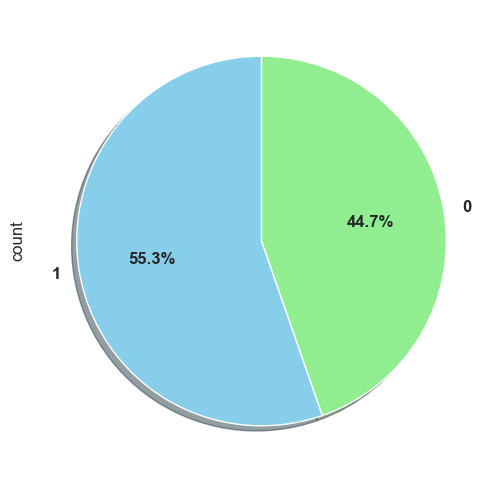

In [10]:
Heart_Disease_Distribution=df['HeartDisease'].value_counts()
print(Heart_Disease_Distribution)
Heart_Disease_Distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['skyblue','lightgreen'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights:
- Slight class imbalance is observed, which may affect model performance.    
- This distribution sets the context for analyzing relationships with other features like **Sex, Age, FastingBS, and ChestPainType**.


Sex
M    725
F    193
Name: count, dtype: int64


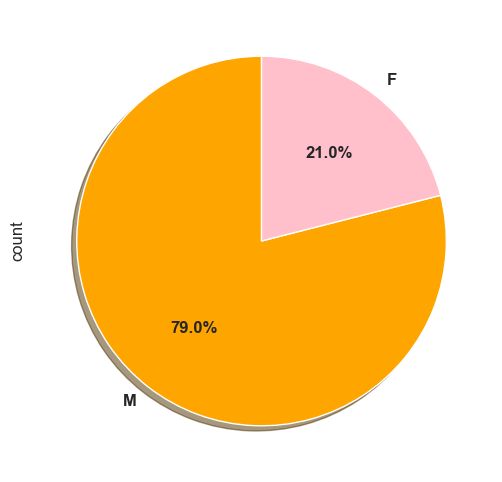

In [12]:
sex_distribution=df['Sex'].value_counts()
print(sex_distribution)
sex_distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['orange', 'pink'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights:  
- The dataset is **predominantly male**, which may impact analysis outcomes.  
- Visualizing such distributions helps identify **representation gaps** early.  


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


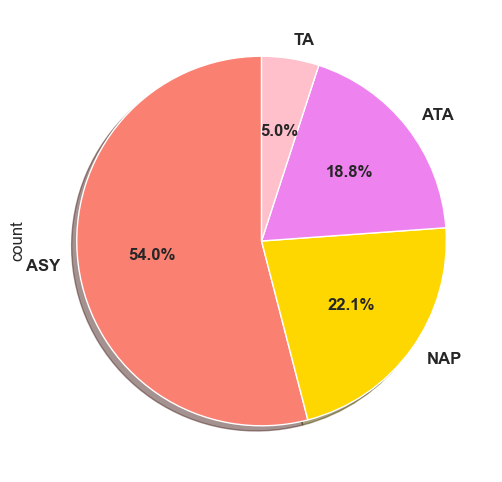

In [14]:
chest_pain_distribution=df['ChestPainType'].value_counts()
print(chest_pain_distribution)
chest_pain_distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['salmon', 'gold', 'violet','pink'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights:* 
- Majority of patients are **Asymptomatic (ASY)**.  
- **TA (Typical Angina)** is the least frequent.  
- This distribution helps in understanding **patient population and potential model biases**.


FastingBS
0    704
1    214
Name: count, dtype: int64


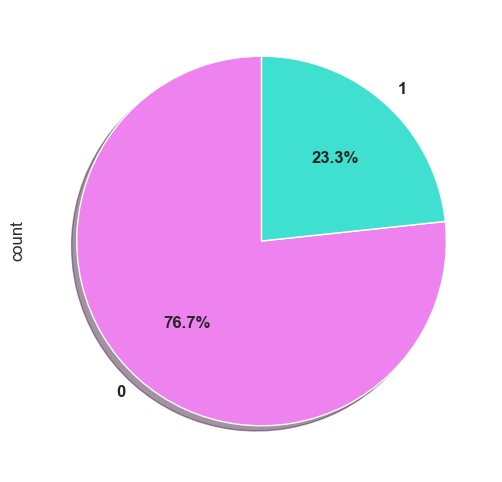

In [16]:
Fasting_Blood_Sugar_Distribution=df['FastingBS'].value_counts()
print(Fasting_Blood_Sugar_Distribution)
Fasting_Blood_Sugar_Distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['violet', 'turquoise'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights: 
- Most patients fall in the normal range.  
- Visualizing this helps understand the overall **health profile of the dataset**.  
- Can be used later in **bivariate analysis with Heart Disease**.

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


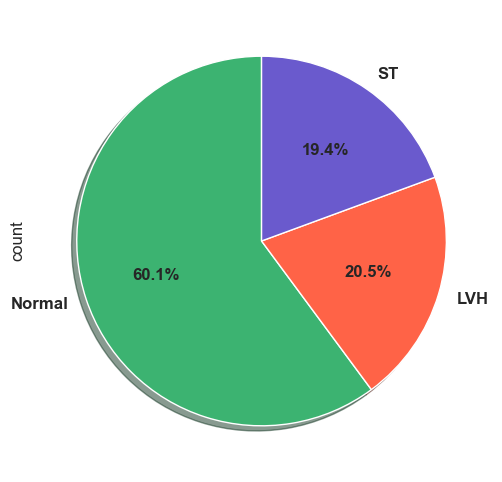

In [18]:
Resting_ECG_Distribution=df['RestingECG'].value_counts()
print(Resting_ECG_Distribution)
Resting_ECG_Distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['mediumseagreen', 'tomato', 'slateblue'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights: 
- Majority of patients have **Normal ECG** readings.  
- LVH and ST abnormalities together form ~39% of the dataset.  
- This distribution is important for understanding **cardiac risk profiles** and for later **bivariate analysis with Heart Disease**.

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


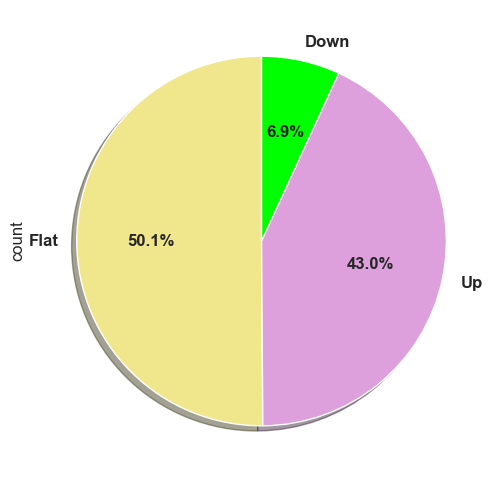

In [20]:
ST_Slope_Distribution=df['ST_Slope'].value_counts()
print(ST_Slope_Distribution)
ST_Slope_Distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['khaki', 'plum', 'lime'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights: 
- Majority of patients have **Flat or Up slope**, while **Down slope** is rare.   
- Later, can be used for **bivariate analysis with Heart Disease** to identify risk patterns.


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


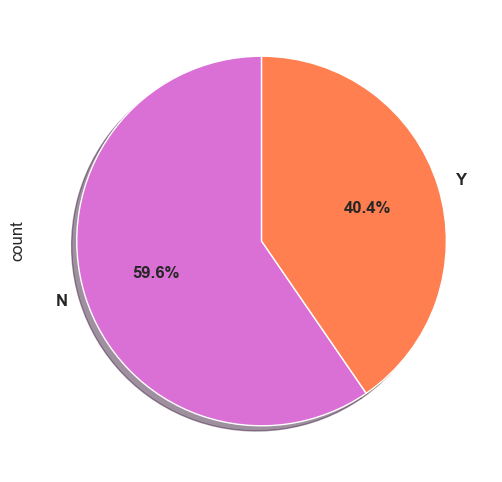

In [22]:
ExerciseAngina_Distribution=df['ExerciseAngina'].value_counts()
print(ExerciseAngina_Distribution)
ExerciseAngina_Distribution.plot(kind="pie",autopct='%1.1f%%',startangle=90, colors=['orchid', 'coral'],shadow=True,textprops={'fontsize':12, 'weight':'bold'},figsize=(6,6))
plt.show()

### Key Insights:
- Majority of patients do **not exhibit exercise-induced angina**.  
- This feature can be crucial for **assessing cardiac risk**.  
- Later, can be analyzed in relation to **Heart Disease** for bivariate insights.

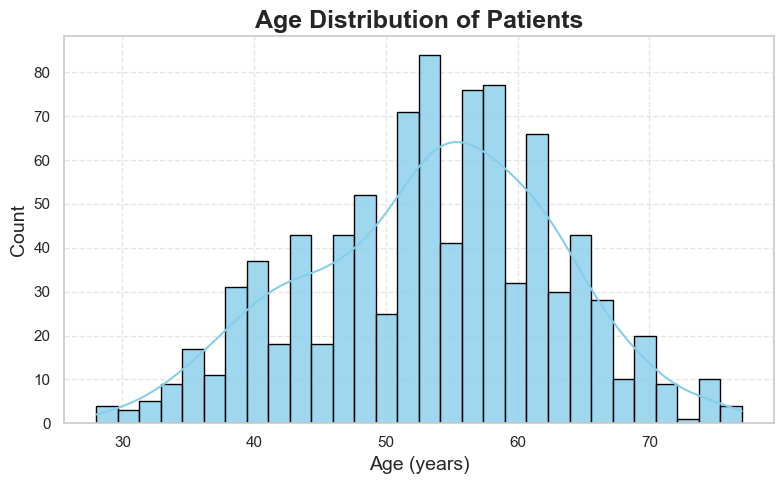

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='Age',
    bins=30,
    kde=True,           
    color='skyblue',          # -- bar color--
    edgecolor='black',        # --bar borders--
    linewidth=1,              # --border thickness--
    alpha=0.8                 # --slight transparency--
)

# --Titles & Labels--
plt.title("Age Distribution of Patients", fontsize=18, weight='bold')
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# --Grid & style tweaks--
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##  Age Distribution of Patients

The age of patients is roughly **normally distributed**, ranging mostly between 30 to 75 years, with a peak around **55–60 years**.

### Key Insights:  
- Most patients are **middle-aged to elderly**.  
- Slight right skew indicates fewer older patients (~75+ years).  
- Normal-like distribution is useful for modeling and feature scaling.


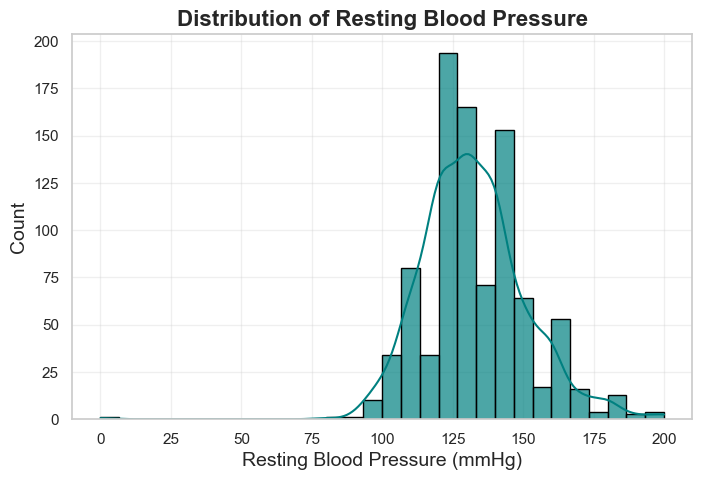

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='RestingBP',
    bins=30,
    kde=True,                     # kernel density estimate
    color='teal',                 # attractive single color
    edgecolor='black',            # bin edges for clarity
    alpha=0.7                      # thoda transparency
)

# --Labels and title--
plt.title("Distribution of Resting Blood Pressure", fontsize=16, weight='bold')
plt.xlabel("Resting Blood Pressure (mmHg)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Grid for clarity
plt.grid(alpha=0.3)

plt.show()

##  Distribution of Resting Blood Pressure

From the plot:
- Most patients have resting blood pressure in the range of *120–140 mmHg*.
- There are some patients with *very high resting blood pressure (>160 mmHg)* which may be considered outliers.
- A few records have resting blood pressure values close to 0, which are not realistic. These likely represent *missing or incorrect data entries* and should be handled during preprocessing.

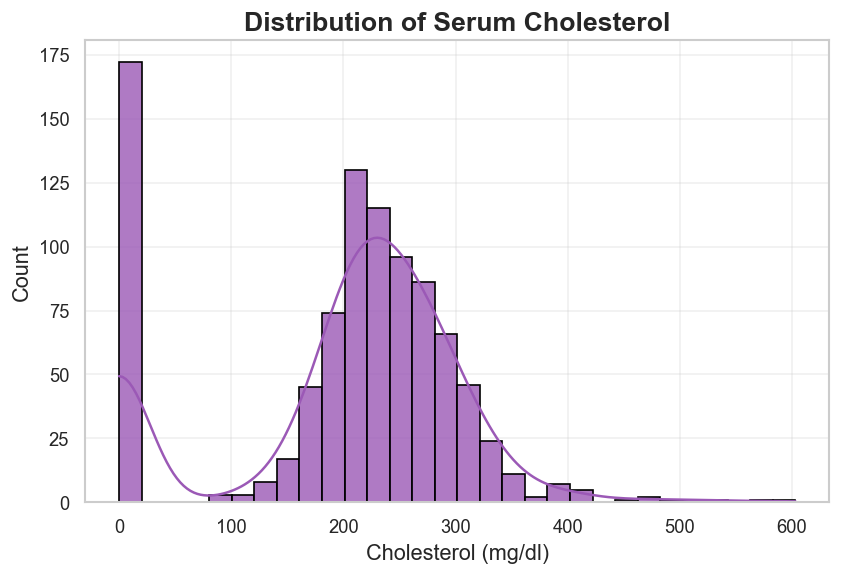

In [28]:

plt.figure(figsize=(8,5), dpi=120)

# Professional color + style
sns.histplot(data=df, x="Cholesterol", bins=30, kde=True, color="#9b59b6", edgecolor="black", alpha=0.8)

# Titles and labels
plt.title("Distribution of Serum Cholesterol", fontsize=16, fontweight="bold")
plt.xlabel("Cholesterol (mg/dl)", fontsize=13)
plt.ylabel("Count", fontsize=13)

# Grid for clarity
plt.grid(alpha=0.3)

plt.show()

## Serum Cholesterol Distribution

The histogram below represents the distribution of *Serum Cholesterol levels (mg/dl)* across patients in the dataset.

### Key Observations:
- Normal Range: Majority of patients have cholesterol values between **200–300 mg/dl*, which aligns with borderline to high cholesterol levels in clinical practice.  
- Unrealistic Values: Some records show cholesterol values **0 mg/dl, which is biologically impossible. These should be treated as **missing or incorrect data* during preprocessing.  
- High Values: A small portion of patients have extremely high cholesterol levels (>400 mg/dl). These could be **outliers* or *rare clinical cases*.  

### Business Insight:
Ensuring accurate cholesterol data is essential for building reliable heart disease prediction models.  
- Cleaning anomalies (0 values, extreme outliers) will improve *model robustness*.  
- Identifying patients in the *200–300 mg/dl range* can help in early intervention strategies for *cardiovascular risk management*.

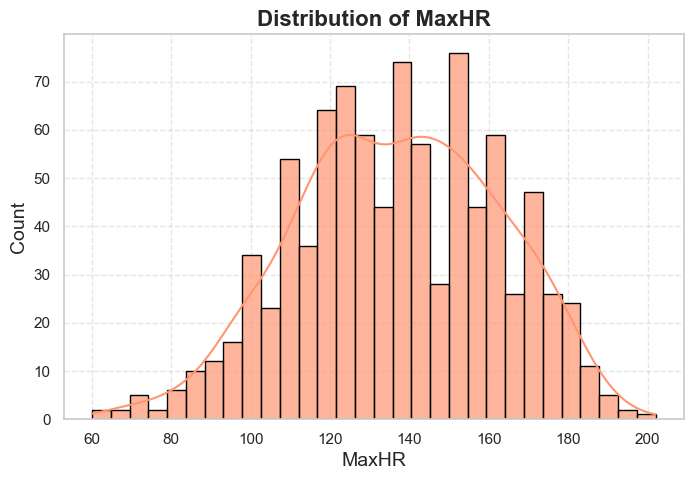

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['MaxHR'], bins=30, kde=True, color= "#FF9671", edgecolor='black', alpha=0.7)

# Titles and labels
plt.title("Distribution of MaxHR", fontsize=16, weight='bold')
plt.xlabel("MaxHR", fontsize=14)
plt.ylabel("Count", fontsize=14)

# tweak grid
plt.grid(True, linestyle='--', alpha=0.5)



plt.show()


### MaxHR Distribution
- The following Histogram show the distribution of MaxHR for a given Dataset.

## key Observation
- Majority of peoples MaxHR lies between the Range of 80 to 180
- Distribution of MaxHR slightly seems be a left skewed, not extreme
- The Data is Normal Distribution Which is extremely better for many purpose like relationship with other feature or many more ....
  beacuse it does not have outliers and anamolies.


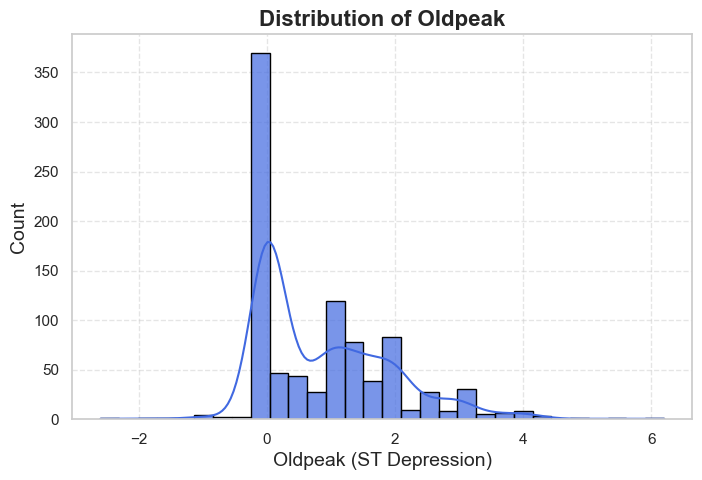

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Oldpeak'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.7)

# Titles and labels
plt.title("Distribution of Oldpeak", fontsize=16, weight='bold')
plt.xlabel("Oldpeak (ST Depression)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# tweak grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

## Distribution of *Oldpeak* (ST Depression)

The histogram below shows the distribution of the *Oldpeak* feature:

-  Most values are concentrated around *0*  
-  The distribution is *right-skewed, meaning more patients have **low ST depression* values compared to higher ones  

This feature is important in analyzing *cardiac stress levels* and may play a key role in *predicting heart disease risk*.

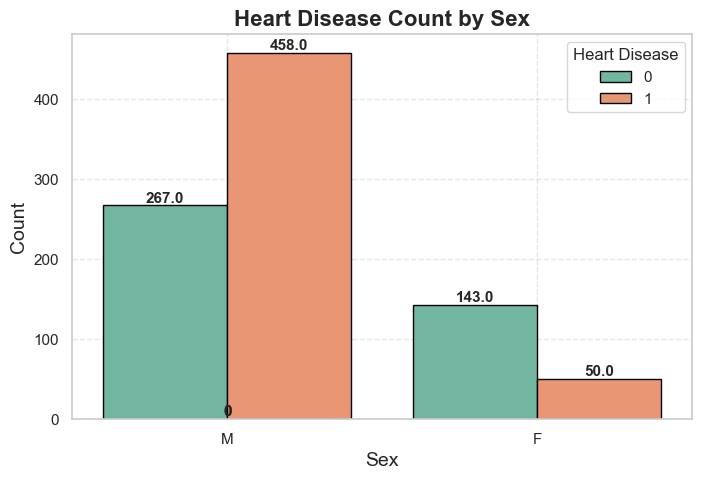

In [34]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")  # Clean background
sns.countplot(
    data=df,
    x='Sex',
    hue='HeartDisease',
    palette='Set2',
    edgecolor='black'
)

# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11, weight='bold')

# Labels, title, legend
plt.title("Heart Disease Count by Sex", fontsize=16, weight='bold')
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper right')

# --grid--
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

###  Key Insights:

This bar chart represents the *distribution of heart disease cases across genders*:

-  A significantly higher number of *males are affected* by heart disease compared to females.  
-  Among females, the majority *do not have heart disease*.  
-  Gender plays a notable role in heart disease distribution and can be a critical predictor in modeling.

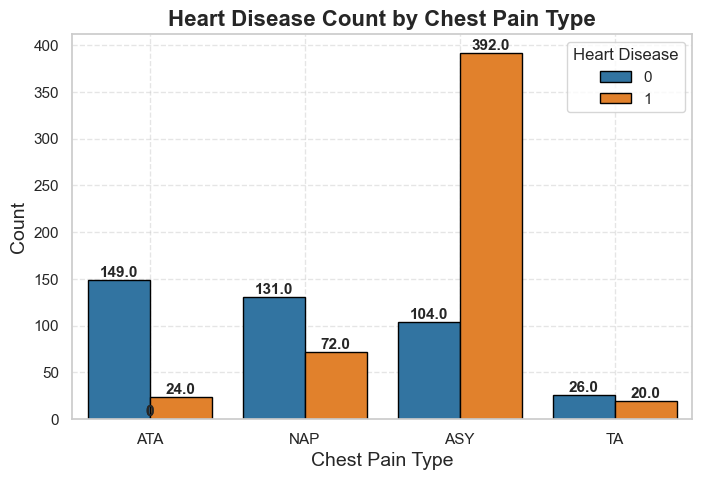

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Using a different color palette
sns.countplot(
    data=df,
    x='ChestPainType',
    hue='HeartDisease',
    palette=['#1f77b4', '#ff7f0e'],  # Custom professional colors (blue and orange)
    edgecolor='black'
)

# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f'{height}', 
        (p.get_x() + p.get_width()/2., height),
        ha='center', 
        va='bottom', 
        fontsize=11, 
        weight='bold'
    )

# Titles and labels
plt.title("Heart Disease Count by Chest Pain Type", fontsize=16, weight='bold')
plt.xlabel("Chest Pain Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper right')


# grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

###  Key Insights:

This bar chart shows how *different chest pain types* are associated with the presence of *heart disease*:

-  *ASY (Asymptomatic)* patients have the *highest heart disease risk*.  
-  *ATA* is mostly linked with *no heart disease*.  
-  Chest pain type is a *critical predictor variable* in heart disease detection models.

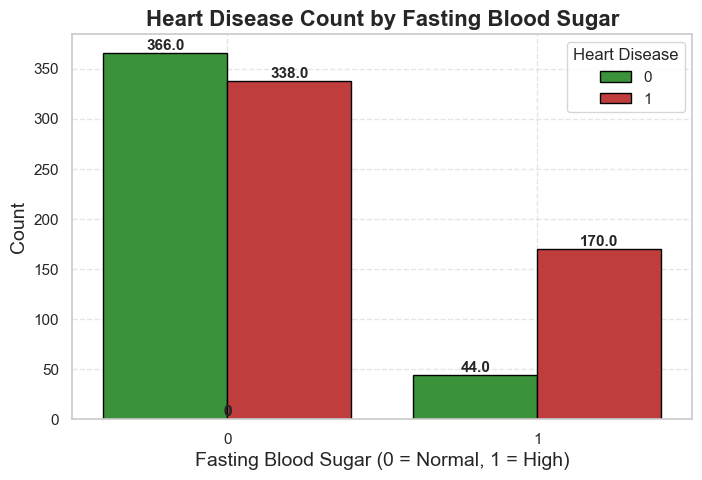

In [38]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.countplot(
    data=df,
    x='FastingBS',
    hue='HeartDisease',
    palette=['#2ca02c', '#d62728'],  # Green = No Disease, Red = Disease
    edgecolor='black'
)


# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f'{height}',
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Titles, labels, legend
plt.title("Heart Disease Count by Fasting Blood Sugar", fontsize=16, weight='bold')
plt.xlabel("Fasting Blood Sugar (0 = Normal, 1 = High)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper right')

# grid
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

###  Key Insights:

This chart shows the relationship between *Fasting Blood Sugar (FBS)* levels and *Heart Disease occurrence*:

-  Most patients fall in the *normal FBS category (0)*.  
-  However, those with *high FBS (1)* show a *higher proportion of heart disease cases*.  
-  FBS is a *significant risk factor* to consider in heart disease prediction.

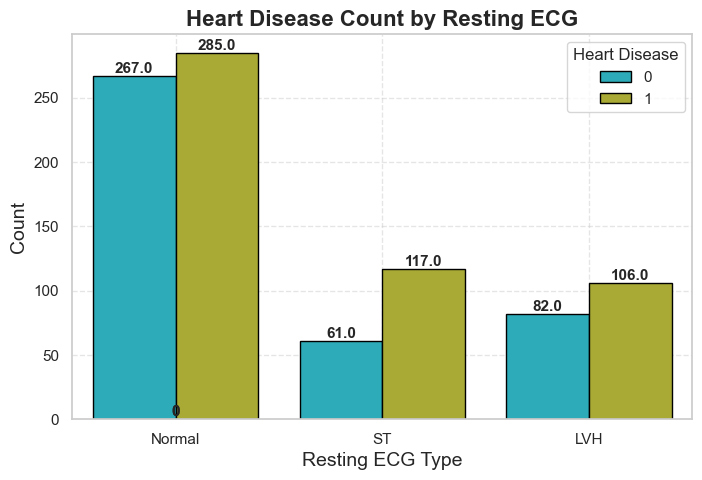

In [40]:

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Professional Countplot
sns.countplot(
    data=df,
    x='RestingECG',
    hue='HeartDisease',
    palette=['#17becf', '#bcbd22'],  # Teal = No Disease, Yellow = Disease
    edgecolor='black'
)

# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f'{height}',
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Titles, labels, legend
plt.title("Heart Disease Count by Resting ECG", fontsize=16, weight='bold')
plt.xlabel("Resting ECG Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper right')

# grid
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

###  Key Insights:

This chart compares *Resting ECG results* with the occurrence of *Heart Disease*:

-  Patients with *ST-T wave abnormalities (ST)* are more likely to have *heart disease*.  
-  *Normal ECG results* show a near-even split between healthy and heart disease patients.  
- Resting ECG is a *useful diagnostic factor*, especially when abnormalities are present.

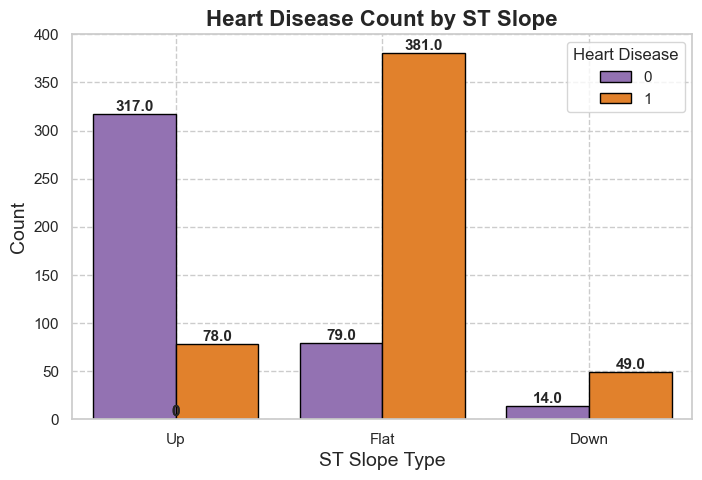

In [42]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Countplot with custom colors
sns.countplot(
    data=df,
    x='ST_Slope',
    hue='HeartDisease',
    palette=['#9467bd', '#ff7f0e'],  # Purple = No Disease, Orange = Disease
    edgecolor='black'
)

# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f'{height}',
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Titles, labels, legend
plt.title("Heart Disease Count by ST Slope", fontsize=16, weight='bold')
plt.xlabel("ST Slope Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper right')

# grid
plt.grid(True, linestyle='--', alpha=1)


plt.show()

###  Key Insights:

This chart shows the relationship between *ST Segment Slope types* and the presence of *Heart Disease*:
-  *Flat slope* is highly associated with *heart disease*.  
-  *Up slope* patients are generally *healthy*, with fewer heart disease cases.  
-  *Down slope* also shows a tendency towards *higher heart disease cases*.  
-   ST Slope is a *strong predictor* in heart disease classification models.

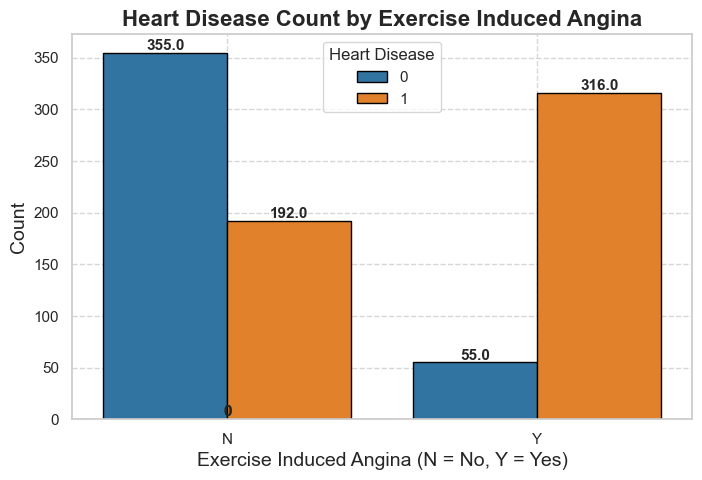

In [44]:

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Professional Countplot
sns.countplot(
    data=df,
    x='ExerciseAngina',
    hue='HeartDisease',
    palette=['#1f77b4', '#ff7f0e'],  # Blue = No Disease, Orange = Disease
    edgecolor='black'
)

# Add counts on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(
        f'{height}',
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Titles, labels, legend
plt.title("Heart Disease Count by Exercise Induced Angina", fontsize=16, weight='bold')
plt.xlabel("Exercise Induced Angina (N = No, Y = Yes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Heart Disease", loc='upper center')

# grid
plt.grid(True, linestyle='--', alpha=0.8)


plt.show()

### Key Insights:

This chart shows how *Exercise-Induced Angina (Yes/No)* relates to *Heart Disease*:

-  Patients with *Exercise-Induced Angina (Yes)* are *far more likely* to have heart disease.  
-  Patients without angina (No) are mostly healthy.  
-  Exercise Angina is a *very strong predictor* for heart disease in this dataset.

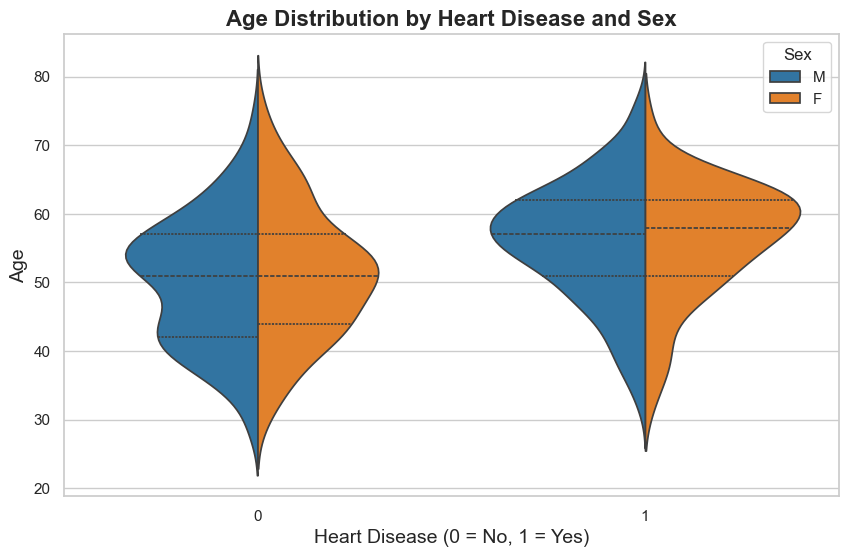

In [46]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Professional Violin plot
sns.violinplot(
    data=df,
    x='HeartDisease',
    y='Age',
    hue='Sex',
    palette=['#1f77b4', '#ff7f0e'],  # Blue = Male, Orange = Female
    split=True,                       # Split violin per hue
    inner='quartile'                  # Shows median + quartiles
)

# Titles, labels, legend
plt.title("Age Distribution by Heart Disease and Sex", fontsize=16, weight='bold')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.legend(title="Sex", loc='upper right')

plt.show()

### Age Distribution by Heart Disease and Sex

- **Males without Heart Disease (0)**: Age mostly concentrated between **50–60 years**.  
- **Females without Heart Disease (0)**: Age spread is wider, mostly **45–55 years**.  
- **Males with Heart Disease (1)**: Age mostly **50–60 years**, slightly higher median than healthy males.  
- **Females with Heart Disease (1)**: Age concentrated around **55–70 years**, higher than healthy females.

**Insight:**  
- Heart disease seems to appear at slightly **older ages for females** compared to males.  
- Male age distribution is more compact, whereas female age distribution is **more spread out**, especially in diseased group.


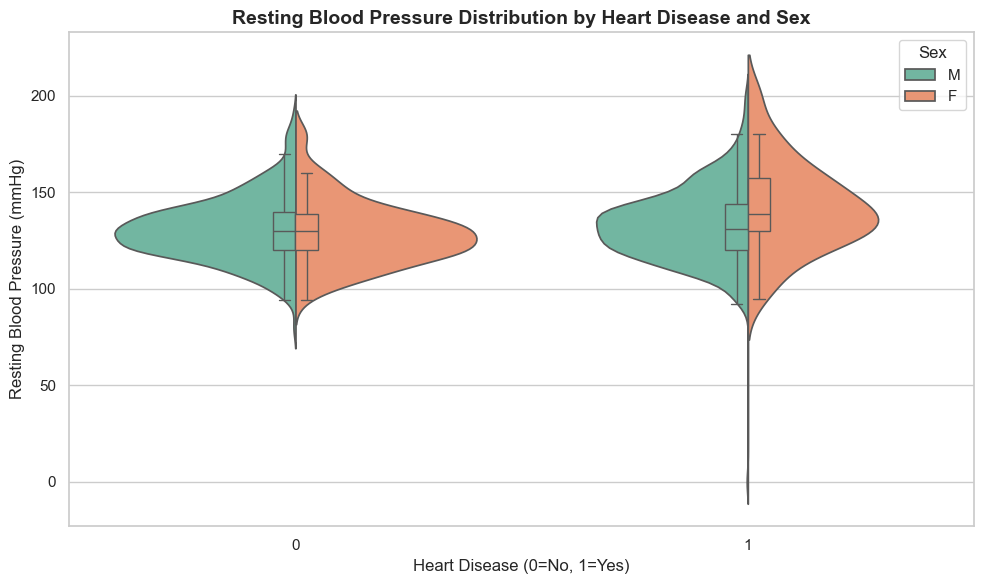

In [48]:
plt.figure(figsize=(10,6))

# Violin plot
sns.violinplot(
    data=df,
    x='HeartDisease',
    y='RestingBP',
    hue='Sex',
    split=True,            # Male/Female ek hi violin me split
    inner=None,            # Boxplot ke liye inner=None
    palette='Set2'
)

# Overlay boxplot for median and quartiles
sns.boxplot(
    data=df,
    x='HeartDisease',
    y='RestingBP',
    hue='Sex',
    width=0.1,             # Narrow boxes
    palette='Set2',
    fliersize=0,            # Hide outliers
    showcaps=True,
    dodge=True
)

# Title and labels
plt.title("Resting Blood Pressure Distribution by Heart Disease and Sex", fontsize=14, fontweight='bold')
plt.xlabel("Heart Disease (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Resting Blood Pressure (mmHg)", fontsize=12)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Sex")

# Show figure
plt.tight_layout()
plt.show()

### Resting BP Distribution by Heart Disease and Sex
**Healthy individuals (Heart Disease = 0):**

- Male B.P. roughly 120–140 mmHg, average ~130 

- Female B.P. roughly 120–140 mmHg, average ~130 

**Heart Disease patients (Heart Disease = 1):**

- Male B.P. roughly 130 mmHg,little high but mostly 120–160 

- Female B.P. roughly 140 mmHg, generally slightly higher than male

- Female resting BP > Male resting BP for heart disease

### Key Insights

**Extreme high B.P. (>200 mmHg):**

- From analysis Voilin PLot we conclude that ,If a Person have Resting B.P of more than 200 mmhg,there is huge or confirm chance that a person have to be suffer from a Heart Disease.

**Median comparison:**

- For Healthy male and female median  are similar

- For Heart disease female  median are higher than male .

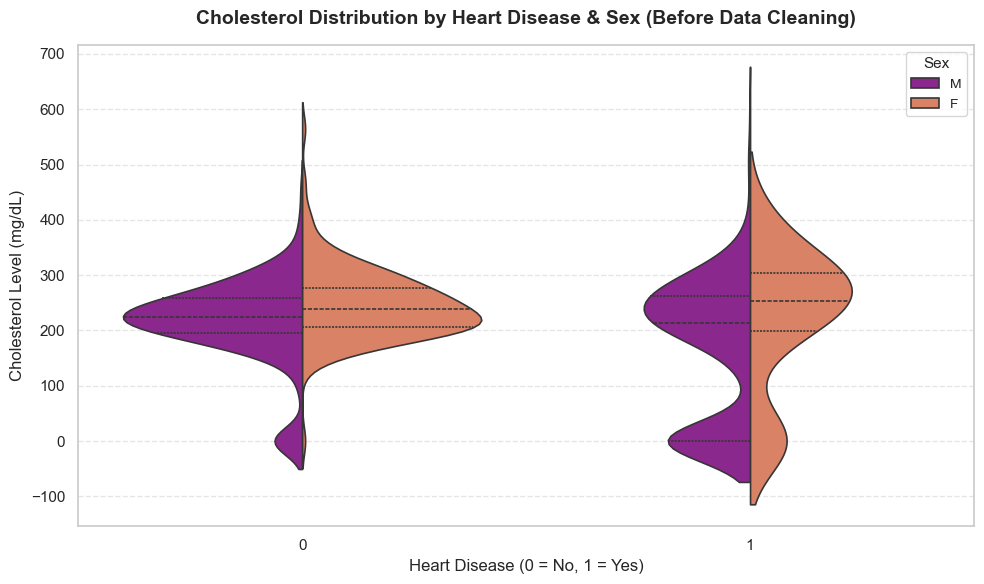

In [50]:
sns.set_theme(style="whitegrid")  # clean background

# --- Figure Setup ---
plt.figure(figsize=(10, 6))

# --- Violin Plot ---
sns.violinplot(
    data=df,
    x='HeartDisease',
    y='Cholesterol',
    hue='Sex',
    palette='plasma',        # modern & attractive color scheme
    split=True,              # merge male & female for compact comparison
    inner='quartile',        # show median & IQR lines
    linewidth=1.2            # sharp, clean edges
)

# --- Title & Labels ---
plt.title("Cholesterol Distribution by Heart Disease & Sex (Before Data Cleaning)",
          fontsize=14, weight='bold', pad=15)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Cholesterol Level (mg/dL)", fontsize=12)


# --- Legend Customization ---
plt.legend(title="Sex", fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# --- Grid ---
plt.grid(axis='y', linestyle='--', alpha=0.5)  # soft horizontal grid

# --- Show Plot ---
plt.tight_layout()
plt.show()

### Key Insights 
- Cholesterol Values Seems less than or zero which clearly indicate how is the data impure or skewed Because a Person which is alive does not have a Cholesterol less than 100 mg ,It must be higher than this more and more on....
- Here the Cholesterol contain anamolies and outlier which make the data imbalanced , We remove aur impute the values in Data Cleaning Steps
  which is Next in ML pipeline.

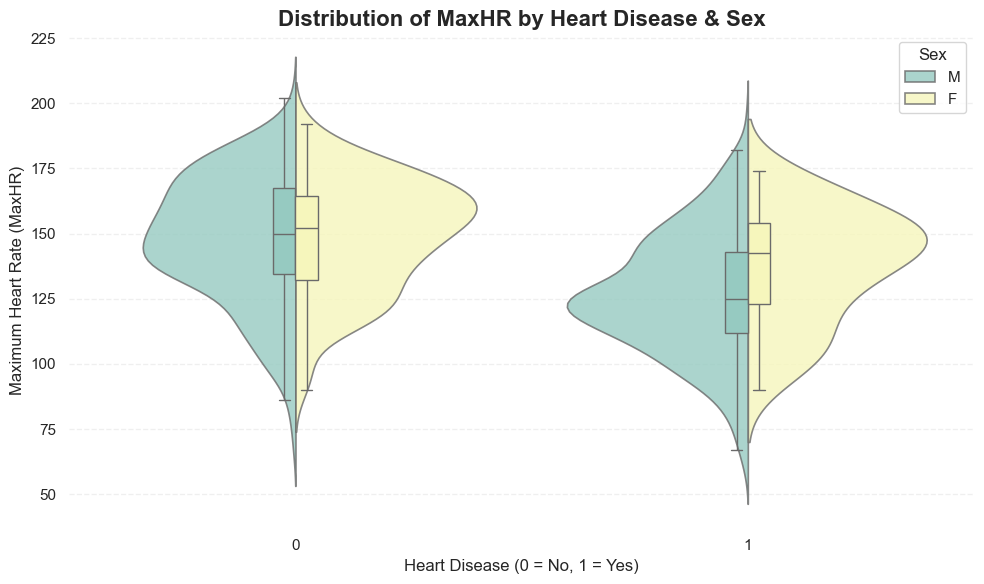

In [52]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='HeartDisease', 
    y='MaxHR', 
    hue='Sex',
    split=True,                  # Separate male & female inside the same violin
    palette="Set3",            
    linewidth=1.2,               # Makes edges sharper
    alpha=0.8,
    inner=None
)

sns.boxplot(
    data=df,
    x='HeartDisease', 
    y='MaxHR', 
    hue='Sex',
    palette='Set3',
    dodge=True,
    fliersize=0,
    width=0.1,
    showcaps=True
)

# Title & Labels
plt.title("Distribution of MaxHR by Heart Disease & Sex", fontsize=16, fontweight='bold')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Maximum Heart Rate (MaxHR)", fontsize=12)

    
# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Sex")

    
# Professional grid & borders
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


##  Distribution of MaxHR by Heart Disease & Sex

### Healthy Individuals (HeartDisease = 0)
- **Healthy Males:**  
  - MaxHR ≈ **135 to 180**  
  - **Average:** ~150  
  - Distribution: *Left-skewed*  

- **Healthy Females:**  
  - MaxHR ≈ **135 to 175**  
  - **Average:** ~155  
  - Distribution: *Slightly balanced*  

---

###  Individuals with Heart Disease (HeartDisease = 1)
- **Males with Heart Disease:**  
  - MaxHR ≈ **115 to 135**  
  - **Average:** ~120  
  - Distribution: *Left-skewed*  

- **Females with Heart Disease:**  
  - MaxHR ≈ **135 to 175**  
  - **Average:** ~140  
  - Distribution: *Slightly higher than males*  

---

###  Key Insights
- If **MaxHR < 75 and > 70**, there is a **very high chance** the person is **male**.
- **Females with Heart Disease** generally have **higher MaxHR** compared to **males** with Heart Disease.

---

###  Median Comparison
- Among **healthy individuals**, the **median MaxHR** for females is **slightly higher** than males.
- Among **heart disease patients**, the **median MaxHR** for females is **significantly higher** than males.


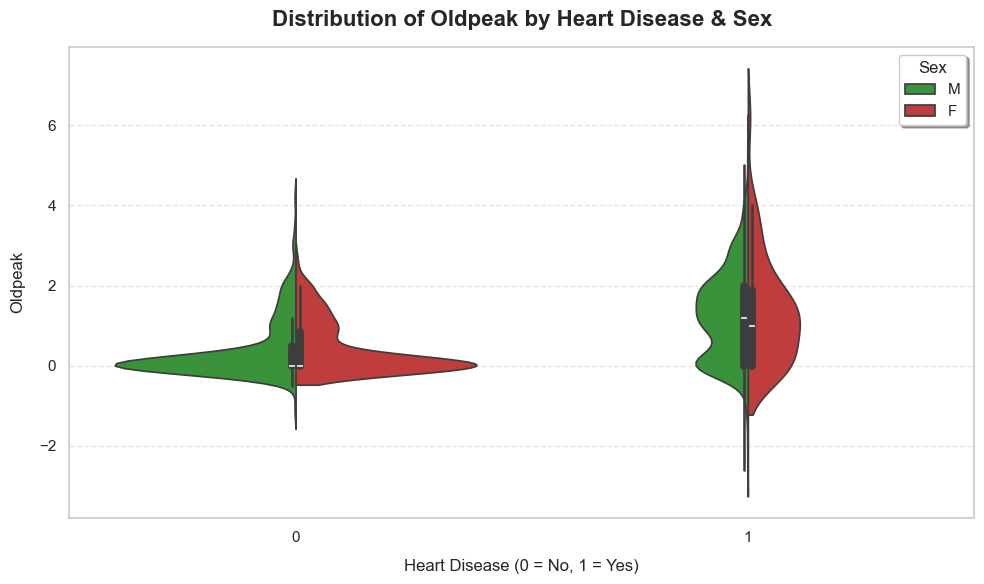

In [54]:
# --- Professional Violin Plot ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Clean background

# Violinplot
sns.violinplot(
    data=df,
    x='HeartDisease',
    y='Oldpeak',
    hue='Sex',
    palette=["#2ca02c", "#d62728"],  # green for female and red for male
    split=True
)

# Title & Labels
plt.title("Distribution of Oldpeak by Heart Disease & Sex", fontsize=16, weight='bold', pad=15)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)", fontsize=12, labelpad=10)
plt.ylabel("Oldpeak", fontsize=12, labelpad=10)

# Legend Customization
plt.legend(
    title='Sex',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    shadow=True
)

# Grid Customization
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### Observations:
- **Healthy Individuals (HeartDisease = 0):**
    - Males generally have lower Oldpeak values, mostly centered around `0`.
    - Females also show very low Oldpeak, but slightly higher variation.
- **Heart Disease Patients (HeartDisease = 1):**
    - Both males and females show higher Oldpeak values.
    - The distribution is wider and more spread, especially for males.
  
### Key Insights:
- Patients with **Heart Disease** tend to have **higher Oldpeak values**.
- Among heart patients, males show slightly higher Oldpeak variability.
- Healthy individuals mostly have Oldpeak ≈ `0`, with very little spread.

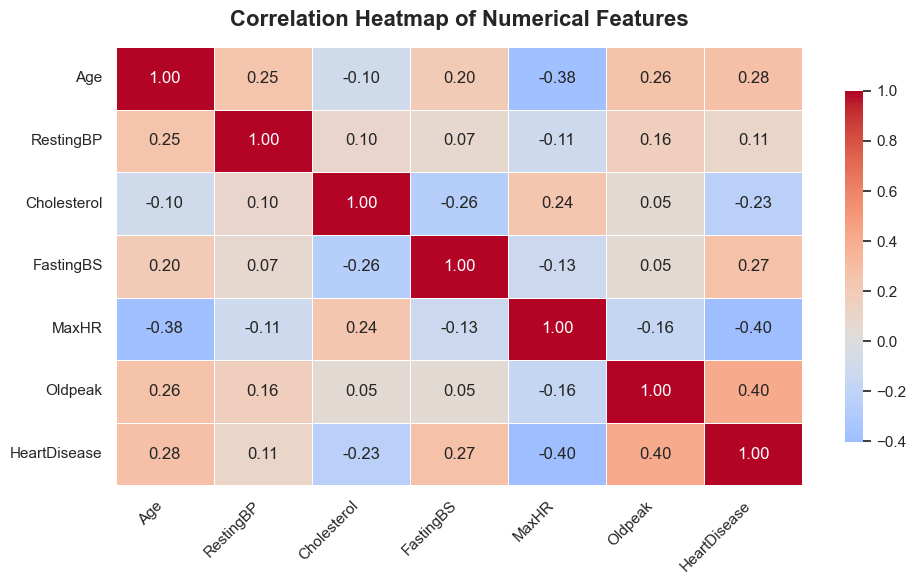

In [56]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,               # Show correlation values
    fmt=".2f",                # Format for numbers
    cmap="coolwarm",          # Attractive color palette
    center=0,                 # Center around zero for better visualization
    linewidths=0.5,           # Add lines between cells
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

# --- Title & Styling ---
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight="bold", pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Key Insights:
- **MaxHR** and **HeartDisease** → **Strong negative correlation (-0.40)**  
  → Lower MaxHR often relates to Heart Disease.
- **Oldpeak** and **HeartDisease** → **Positive correlation (~0.40)**  
  → Higher Oldpeak is linked to higher chances of Heart Disease.
- **Age** shows moderate correlation with Heart Disease (~0.28).  
- **Cholesterol** and **HeartDisease** are **less correlated (~-0.23)**.


### Data Cleaning

In [59]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
RestingBP_median=df[df['RestingBP']!=0]['RestingBP'].median()
df['RestingBP']=df['RestingBP'].replace(0,RestingBP_median)

In [62]:
Cholesterol_median=df[df['Cholesterol']!=0]['Cholesterol'].median()
df['Cholesterol']=df['Cholesterol'].replace(0,Cholesterol_median)

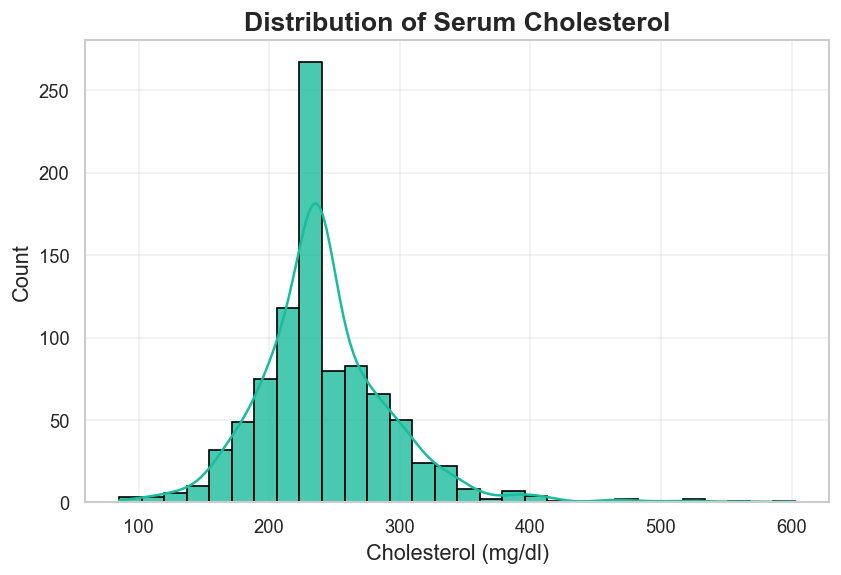

In [63]:
plt.figure(figsize=(8,5), dpi=120)

# Professional color + style
sns.histplot(data=df, x="Cholesterol", bins=30, kde=True, color="#1abc9c", edgecolor="black", alpha=0.8)

# Titles and labels
plt.title("Distribution of Serum Cholesterol", fontsize=16, fontweight="bold")
plt.xlabel("Cholesterol (mg/dl)", fontsize=13)
plt.ylabel("Count", fontsize=13)

# Grid for clarity
plt.grid(alpha=0.3)

plt.show()

### Observations
- Slightly Right skewed Because Person have a Cholesterol of above 450 which is rare but can a
- Little Normal Distribition of Cholesterol will be showed here after removing outliers.
- Persons Cholesterol mostly in range between 180 to 300.

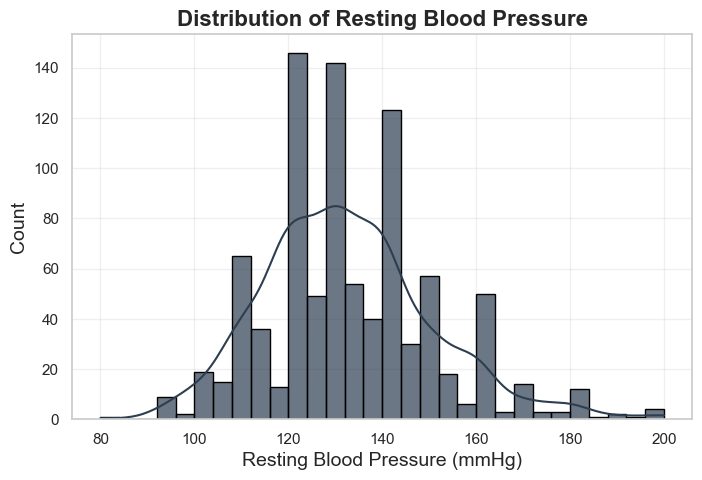

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='RestingBP',
    bins=30,
    kde=True,                     # kernel density estimate
    color="#2c3e50",               
    edgecolor='black',            # bin edges for clarity
    alpha=0.7                      # thoda transparency
)

# --Labels and title--
plt.title("Distribution of Resting Blood Pressure", fontsize=16, weight='bold')
plt.xlabel("Resting Blood Pressure (mmHg)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Grid for clarity
plt.grid(alpha=0.3)

plt.show()


###  Data Cleaning
- Detected **invalid value(s): RestingBP = 0** (clinically impossible).
- Action taken: **Imputed** those value(s) (filled) → distribution became realistic.
- Result: Histogram now looks **approximately normal (bell-shaped)**.

###  What the Plot Shows
- Peak around **120–130 mmHg** (expected for healthy adults).
- Most observations lie in **110–140 mmHg**.
- A small tail towards **≥160 mmHg** indicates possible **hypertension** cases.
- Extreme values near **≥180–200 mmHg** are **rare** and should be reviewed as potential high-risk or data issues.

###  Takeaways
- Cleaning **zero values** removed left-skew and revealed a **more symmetric** distribution.
- Consider flagging cases **≥160 mmHg** for clinical risk analysis in downstream modeling.


### Data Preprocessing

In [68]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
Label_Encoding_columns=['Sex','ExerciseAngina']
df['Sex']=df['Sex'].map({"M":1,"F":0})
df['ExerciseAngina']=df['ExerciseAngina'].map({"N":0,"Y":1})

In [70]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [71]:
One_hot_label_Encoding_Columns=['ChestPainType','RestingECG','ST_Slope']
df = pd.get_dummies(df, columns=One_hot_label_Encoding_Columns, drop_first=True)

In [72]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,0,0.0,1,True,False,False,False,False,True,False


In [73]:
df.astype('int')

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,0,1,1,0,1,0
914,68,1,144,193,1,141,0,3,1,0,0,0,1,0,1,0
915,57,1,130,131,0,115,1,1,1,0,0,0,1,0,1,0
916,57,0,130,236,0,174,0,0,1,1,0,0,0,0,1,0


In [74]:
df=df.astype('int')

In [75]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,0,1,1,0,1,0
914,68,1,144,193,1,141,0,3,1,0,0,0,1,0,1,0
915,57,1,130,131,0,115,1,1,1,0,0,0,1,0,1,0
916,57,0,130,236,0,174,0,0,1,1,0,0,0,0,1,0


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns=['Age','RestingBP','Cholesterol','MaxHR']

In [77]:
df[columns]=scaler.fit_transform(df[columns])

In [78]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.415002,0.858035,0,1.382928,0,0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527329,-1.184227,0,0.754157,0,1,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141161,0.745617,0,-1.525138,0,0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303769,-0.547191,0,-1.132156,1,1,1,0,0,0,1,0,1,0
4,0.051881,1,0.971166,-0.903182,0,-0.581981,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.253488,0.389626,0,-0.188999,0,1,1,0,0,1,1,0,1,0
914,1.536902,1,0.637468,-0.940654,1,0.164684,0,3,1,0,0,0,1,0,1,0
915,0.370100,1,-0.141161,-2.102308,0,-0.857069,1,1,1,0,0,0,1,0,1,0
916,0.370100,0,-0.141161,-0.134991,0,1.461525,0,0,1,1,0,0,0,0,1,0


In [79]:
df=df.rename(columns={"Sex":"Is_Male"})

In [80]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   Is_Male            918 non-null    int32  
 2   RestingBP          918 non-null    float64
 3   Cholesterol        918 non-null    float64
 4   FastingBS          918 non-null    int32  
 5   MaxHR              918 non-null    float64
 6   ExerciseAngina     918 non-null    int32  
 7   Oldpeak            918 non-null    int32  
 8   HeartDisease       918 non-null    int32  
 9   ChestPainType_ATA  918 non-null    int32  
 10  ChestPainType_NAP  918 non-null    int32  
 11  ChestPainType_TA   918 non-null    int32  
 12  RestingECG_Normal  918 non-null    int32  
 13  RestingECG_ST      918 non-null    int32  
 14  ST_Slope_Flat      918 non-null    int32  
 15  ST_Slope_Up        918 non-null    int32  
dtypes: float64(4), int32(12)
m

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
numeric_df = df.select_dtypes(include=['float', 'int'])

# --- VIF calculation ---
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) 
                   for i in range(numeric_df.shape[1])]

print(vif_data)

              Feature       VIF
0                 Age  1.384125
1             Is_Male  5.002439
2           RestingBP  1.107726
3         Cholesterol  1.046584
4           FastingBS  1.465671
5               MaxHR  1.515804
6      ExerciseAngina  2.626159
7             Oldpeak  2.020424
8        HeartDisease  4.887931
9   ChestPainType_ATA  1.838143
10  ChestPainType_NAP  1.612991
11   ChestPainType_TA  1.163190
12  RestingECG_Normal  3.880702
13      RestingECG_ST  1.964534
14      ST_Slope_Flat  4.799303
15        ST_Slope_Up  4.105987


In [84]:
df

,Age,Is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.415002,0.858035,0,1.382928,0,0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527329,-1.184227,0,0.754157,0,1,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141161,0.745617,0,-1.525138,0,0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303769,-0.547191,0,-1.132156,1,1,1,0,0,0,1,0,1,0
4,0.051881,1,0.971166,-0.903182,0,-0.581981,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.253488,0.389626,0,-0.188999,0,1,1,0,0,1,1,0,1,0
914,1.536902,1,0.637468,-0.940654,1,0.164684,0,3,1,0,0,0,1,0,1,0
915,0.370100,1,-0.141161,-2.102308,0,-0.857069,1,1,1,0,0,0,1,0,1,0
916,0.370100,0,-0.141161,-0.134991,0,1.461525,0,0,1,1,0,0,0,0,1,0


In [85]:
df.columns

Index(['Age', 'Is_Male', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [86]:
columns_for_chi=['Is_Male', 'FastingBS',
       'ExerciseAngina','ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']

In [87]:
from scipy.stats import chi2_contingency# contingency table
alpha=0.05
result={}
for column in columns_for_chi:
    table = pd.crosstab(df[column], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(table)
    if p>alpha:
        print(f"Accept null hypothesis,no assocaition relation --> Drop {column}")
    else:
        print(f"Reject null hypothesis, asocaition relation --> keep {column}")
        result[column]=p
    

Reject null hypothesis, asocaition relation --> keep Is_Male
Reject null hypothesis, asocaition relation --> keep FastingBS
Reject null hypothesis, asocaition relation --> keep ExerciseAngina
Reject null hypothesis, asocaition relation --> keep ChestPainType_ATA
Reject null hypothesis, asocaition relation --> keep ChestPainType_NAP
Accept null hypothesis,no assocaition relation --> Drop ChestPainType_TA
Reject null hypothesis, asocaition relation --> keep RestingECG_Normal
Reject null hypothesis, asocaition relation --> keep RestingECG_ST
Reject null hypothesis, asocaition relation --> keep ST_Slope_Flat
Reject null hypothesis, asocaition relation --> keep ST_Slope_Up


In [88]:
chi_df=pd.DataFrame(result.items(),columns=["Feature","P_value"])

In [89]:
chi_df

,Feature,P_value
0,Is_Male,4.597617e-20
1,FastingBS,1.057302e-15
2,ExerciseAngina,2.907808e-50
3,ChestPainType_ATA,1.152597e-33
4,ChestPainType_NAP,1.859758e-10
5,RestingECG_Normal,6.790624e-03
6,RestingECG_ST,2.507290e-03
7,ST_Slope_Flat,8.906496e-63
8,ST_Slope_Up,1.028493e-78


In [90]:
X.drop(columns=['ChestPainType_ATA'],inplace=True)

In [91]:
X

,Age,Is_Male,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.415002,0.858035,0,1.382928,0,0,0,0,1,0,0,1
1,-0.478484,0,1.527329,-1.184227,0,0.754157,0,1,1,0,1,0,1,0
2,-1.751359,1,-0.141161,0.745617,0,-1.525138,0,0,0,0,0,1,0,1
3,-0.584556,0,0.303769,-0.547191,0,-1.132156,1,1,0,0,1,0,1,0
4,0.051881,1,0.971166,-0.903182,0,-0.581981,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.253488,0.389626,0,-0.188999,0,1,0,1,1,0,1,0
914,1.536902,1,0.637468,-0.940654,1,0.164684,0,3,0,0,1,0,1,0
915,0.370100,1,-0.141161,-2.102308,0,-0.857069,1,1,0,0,1,0,1,0
916,0.370100,0,-0.141161,-0.134991,0,1.461525,0,0,0,0,0,0,1,0


In [92]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [93]:
print('Rows of X_train : ',X_train.shape[0])
print('Colmns of X_train : ',X_train.shape[1])
print('Rows of X_test : ',X_test.shape[0])
print('Columns of X_test : ',X_test.shape[1])

Rows of X_train :  734
Colmns of X_train :  14
Rows of X_test :  184
Columns of X_test :  14


In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [95]:
# Logistic Regression
lg_model = LogisticRegression(
    C=0.1, solver='lbfgs', penalty='l2', random_state=42
)

# SVM
svm_model = SVC(
    kernel='rbf', gamma='scale', C= 1,probability=True
)

# KNN
knn_model = KNeighborsClassifier(
    weights='uniform', n_neighbors=7, metric='manhattan'
)

# Gaussian Naive Bayes
gnb_model = GaussianNB(var_smoothing=1e-09)

# Decision Tree
dt_model = DecisionTreeClassifier(
    min_samples_split=5, min_samples_leaf=4, max_depth=5,criterion='entropy'
)

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=10, min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    max_depth=None
)

# Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.05,
    max_depth=3,subsample=1.0,
    random_state=42
)


In [96]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=500, learning_rate=0.05,
    max_depth=5, subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# LightGBM
lgb = LGBMClassifier(
    n_estimators=500, learning_rate=0.05,
    num_leaves=31, subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# CatBoost
cat = CatBoostClassifier(
    iterations=500, learning_rate=0.05,
    depth=6, verbose=0,
    random_state=42
)


In [97]:
svm2_model = SVC(
    kernel='rbf', gamma='scale', C= 1,probability=True
)

In [98]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('lg', lg_model),
        ('svm', svm2_model)
    ],
    voting='soft'
)


In [99]:
stack_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('knn', knn_model),
        ('svm', svm_model),
        ('lg', lg_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)


In [100]:
!pip install catboost

In [101]:
# Common parameters
LogisticRegression(
    penalty='l2',       # 'l1', 'l2', 'elasticnet', 'none'
    C=1.0,              # inverse regularization strength
    solver='lbfgs',     # 'liblinear', 'saga', etc.
    max_iter=1000
)

# Hyperparameter tuning grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}


In [102]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.8555493430248813


In [103]:
# Common parameters
RandomForestClassifier(
    n_estimators=100,         # number of trees
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Hyperparameter tuning grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best accuracy: 0.8582704314602554


In [104]:
GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

# Hyperparameter tuning grid
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=20,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05}
Best accuracy: 0.8487093467523996


In [105]:
# Common parameters
DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',  # or 'entropy'
    random_state=42
)

# Hyperparameter tuning grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    n_iter=20,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)



Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}
Best accuracy: 0.821479824806635


In [106]:
SVC(
    C=1.0,
    kernel='rbf',  # 'linear', 'poly', 'sigmoid'
    gamma='scale',  # 'auto' or float
    probability=True,
    random_state=42
)

# Hyperparameter tuning grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_grid_svm,
    n_iter=20,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best accuracy: 0.8473767589227471


In [107]:
KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',  # or 'distance'
    metric='minkowski'  # or 'euclidean', 'manhattan'
)

# Hyperparameter tuning grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_grid_knn,
    n_iter=20,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
Best accuracy: 0.8500792097660982


In [108]:
# GaussianNB usually has very few hyperparameters
GaussianNB(
    var_smoothing=1e-9  # small float for numerical stability
)

# Hyperparameter tuning grid
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_grid_nb,
    n_iter=20,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-09}
Best accuracy: 0.8459696207250023


In [109]:
models = {
    "Logistic Regression": lg_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "GaussianNB": gnb_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb,
    "LightGBM": lgb,
    "CatBoost": cat,
    "Soft Voting": voting_clf,
    "Stacking": stack_model
}

best_model = None
best_score = 0

print("=========== Model Accuracy Comparison ===========")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name:20} --> Accuracy: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model = model

print("\n Best Model:", best_model)
print(" Best Accuracy:", best_score)


=========== Model Accuracy Comparison ===========
Logistic Regression  --> Accuracy: 0.8424
SVM                  --> Accuracy: 0.8261
KNN                  --> Accuracy: 0.8533
GaussianNB           --> Accuracy: 0.8370
Decision Tree        --> Accuracy: 0.7935
Random Forest        --> Accuracy: 0.8533
Gradient Boosting    --> Accuracy: 0.8696
XGBoost              --> Accuracy: 0.8370
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best g

In [110]:
param_dist = {
    "n_estimators": [50, 100, 150, 200, 300],       # Number of trees
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    "max_depth": [2, 3, 4, 5, 6],                   # Depth of each tree
    "min_samples_split": [2, 5, 10, 15],            # Minimum samples for a split
    "min_samples_leaf": [1, 2, 4, 6],               # Minimum samples per leaf
    "subsample": [0.6, 0.8, 1.0],                   # Fraction of samples per tree
    "max_features": ["sqrt", "log2", None]          # Features considered per split
}


In [111]:
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=100,                 # Kitne combinations try karne hain
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                        random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [112]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}
Best Cross-Validation Score: 0.8718665548411145
Test Accuracy: 0.8858695652173914


In [113]:
final_model=GradientBoostingClassifier(subsample=0.6,
                                       n_estimators=100,
                                       min_samples_split=10,
                                       min_samples_leaf= 4,
                                       max_features='sqrt',
                                       max_depth= 6,
                                       learning_rate=0.05,
                                       random_state=42
                                      )

In [114]:
final_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features='sqrt',
                           min_samples_leaf=4, min_samples_split=10,
                           random_state=42, subsample=0.6)

In [115]:
y_pred=final_model.predict(X_train)

In [116]:
accuracy_score(y_train,y_pred)

0.9509536784741145

In [117]:
y_pred=final_model.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred)

0.8858695652173914

In [119]:
scores=cross_val_score(estimator=final_model,X=X,y=y,cv=5,scoring="accuracy")

In [120]:
scores.mean()

0.8104062722736993

In [242]:
# Probability predictions
Y_prob=final_model.predict_proba(X_test)[:,1]# Positive class probabilit

In [252]:
tpr,fpr,thresholds=roc_curve(y_test, y_prob)

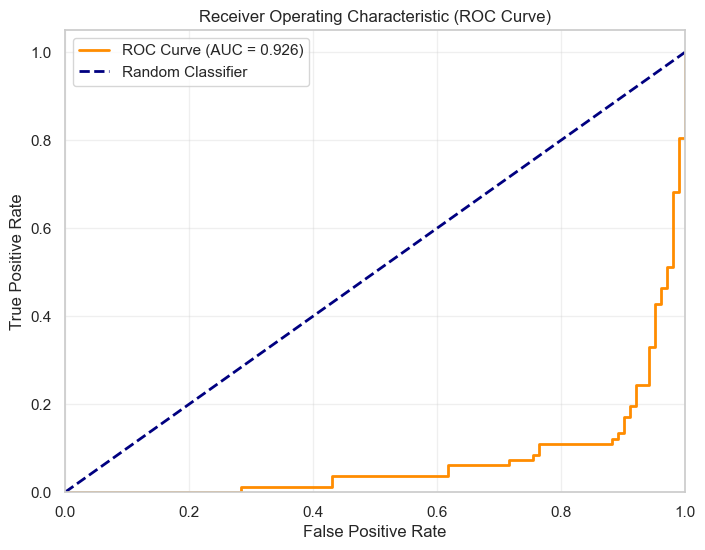

In [266]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()


In [231]:
roc_auc = auc(fpr, tpr)

In [234]:
roc_auc

0.9263510282161646

In [280]:
precison=precision_score(y_test,y_pred)
print("Precision score is :",precison)

Precision score is : 0.8932038834951457


In [284]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[71, 11],
       [10, 92]], dtype=int64)

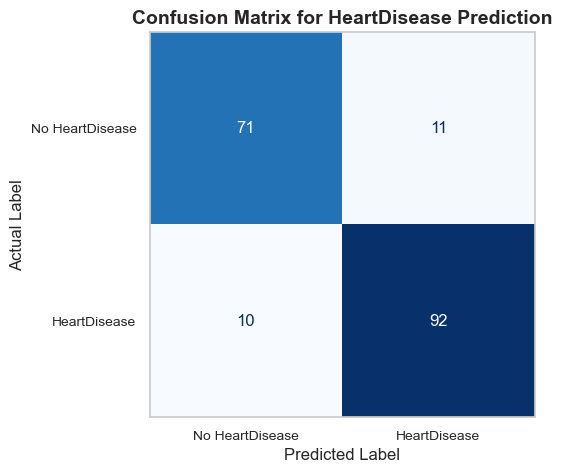

In [304]:
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No HeartDisease', 'HeartDisease'])

# Plotting with customizations
fig, ax = plt.subplots(figsize=(6,5))
display_cm.plot(ax=ax, cmap='Blues', colorbar=False, values_format='d')  # 'd' for integer values

# Customize further
plt.title("Confusion Matrix for HeartDisease Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)  # Hide grid for cleaner look

plt.show()

In [306]:
import pickle

In [ ]:
with open('heart_disease_model.pkl','w)